# Project Overview

## Data Engineering & Data Ingestion

In this section, I connect to a SQLite database containing Walmart sales data and load the data into a Pandas DataFrame for analysis.  
Using a database instead of raw CSV files simulates a more realistic data pipeline commonly used in industry.

Key steps:
- Establish a connection to the SQLite database
- Query the Walmart sales table using SQL
- Parse date fields for time-series analysis


In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('../db/walmart.db')
df = pd.read_sql('Select * FROM walmart_sales', conn, parse_dates =['Date'])
conn.close()
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


## Exploratory Data Analysis (EDA)

Before cleaning or modeling, I performed an initial exploration of the dataset to understand:
- The structure of the data
- Available features
- Data types
- Potential data quality issues

This step helps guide cleaning decisions and analytical direction.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [14]:
df.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,0.255750,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296


In [15]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

### Key Observations
 - The dataset contains weekly sales data across multiple Walmart stores and departments.
 - The 'Date' column is correctly parsed as a datetime object. This will allow us to utilize time-series analysis.
 - Weekly_Sales column shows signs of high variance which can be suggested by seasonality and potential holdiay events
 - No major missing values were found in the key columns besides the 'MarkDown#' columns which will be dealt with soon.

In [17]:
df = df.drop_duplicates()
df = df.sort_values('Date')

<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='Date'>

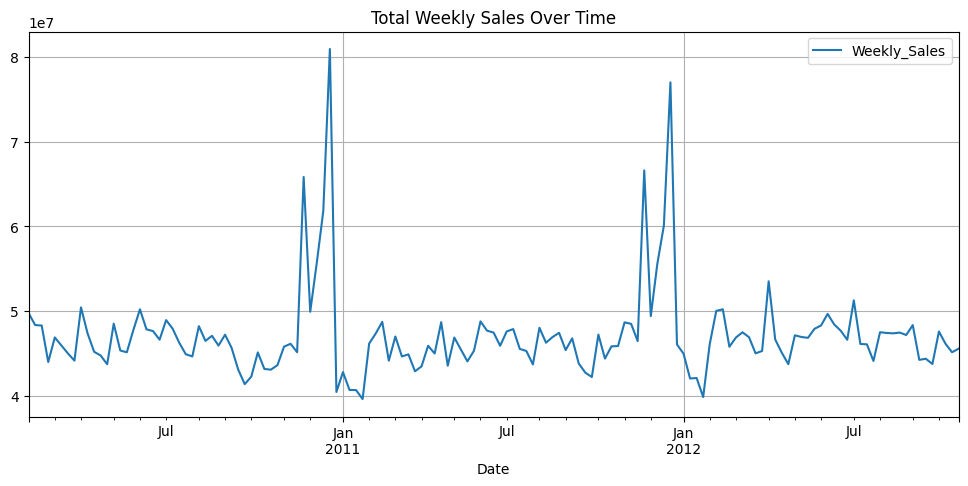

In [18]:

ts = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
ts.plot(
    x='Date',
    y='Weekly_Sales',
    figsize=(12,5),
    grid = True,
    title= 'Total Weekly Sales Over Time'
)

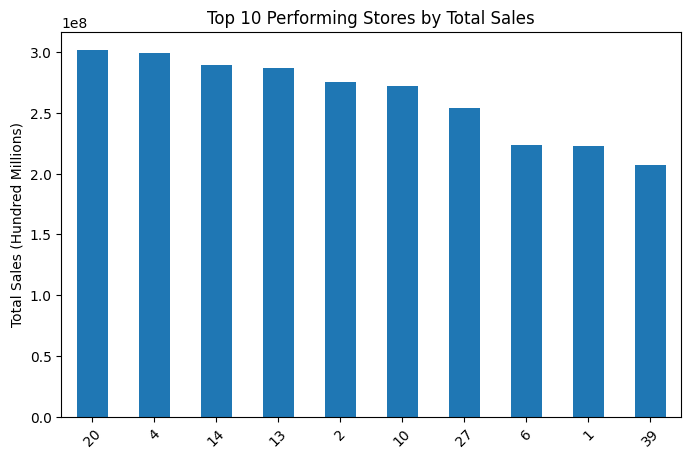

In [30]:
# top 10 stores by total stores (heavy hitters)
top10_stores = (
    df.groupby('Store')['Weekly_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

ax =top10_stores.plot(
    kind='bar',
    figsize=(8, 5),
    title='Top 10 Performing Stores by Total Sales'
)
ax.set_xlabel('')
ax.set_ylabel('Total Sales (Hundred Millions)')
plt.xticks(rotation=45)
plt.show()


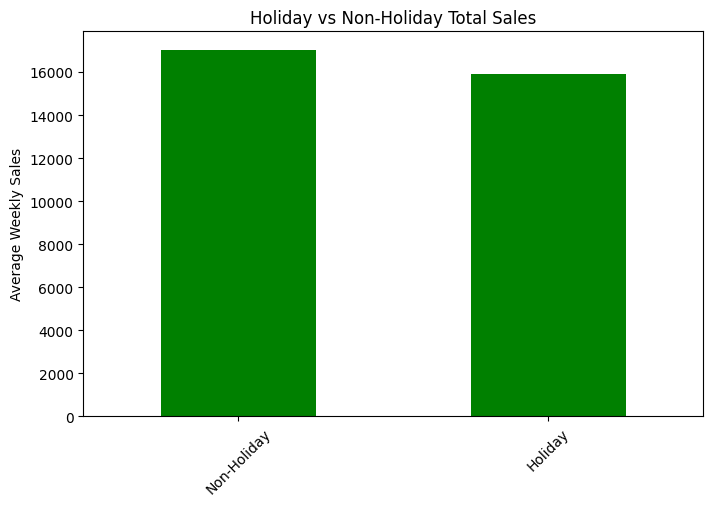

In [28]:
holiday_sales_df =(
    df.groupby('IsHoliday')['Weekly_Sales']
        .mean()
        .sort_values(ascending= False)
)
holiday_sales_df.index =['Non-Holiday','Holiday']
ax = holiday_sales_df.plot(
    kind ='bar',
    color ='green',
    figsize =(8,5),
    title ='Holiday vs Non-Holiday Total Sales'
)
ax.set_xlabel('')
ax.set_ylabel('Average Weekly Sales')
plt.xticks(rotation =45)
plt.show()


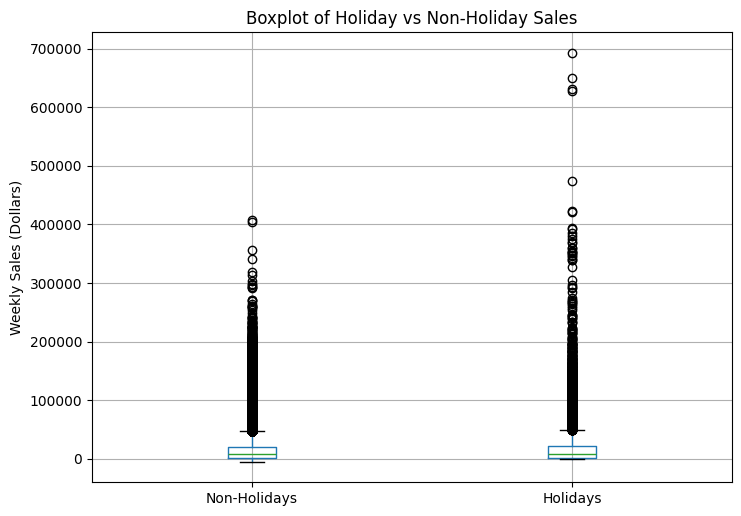

In [37]:
ax =df.boxplot(
    column ='Weekly_Sales',
    by ='IsHoliday',
    figsize =(8,6)
    )
ax.set_title('Boxplot of Holiday vs Non-Holiday Sales')
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Weekly Sales (Dollars)')
ax.set_xticklabels(['Non-Holidays','Holidays'])
plt.show()

### Key Insight
Holiday weeks show higher average weekly sales in comparison to non-holiday weeks. This signifies that seasonal demand has a role in revenuen spikes.

From the boxplots, weekly sales exhibit higher volatility during holiday periods compared to non-holiday weeks.

## Volatility & Stability Analysis

In [41]:
#extract each store's average and std weekly sales
volatility_df =(
    df.groupby('Store')['Weekly_Sales']
        .agg(['mean','std'])
        .rename(columns ={'std':'Sales_Std'})
)
volatility_df.head()

,mean,Sales_Std
Store,,
1,21710.543621,27748.945511
2,26898.070031,33077.612059
3,6373.033983,14251.034807
4,29161.210415,34583.677814
5,5053.415813,8068.221050


In [44]:
#We will calculate the coefficient of variation(CV) to determine a store's variance
volatility_df['CV'] = volatility_df['Sales_Std']/volatility_df['mean']
volatility_df.sort_values('CV', ascending = False).head(10)

,mean,Sales_Std,CV
Store,,,
3,6373.033983,14251.034807,2.236146
44,6038.929814,10609.468795,1.756846
38,7492.478460,12733.356273,1.699485
30,8764.237719,14364.314622,1.638969
5,5053.415813,8068.221050,1.596588
42,11443.370118,18258.531574,1.595555
37,10297.355026,16295.492638,1.582493
33,5728.414053,8973.688840,1.566522
43,13415.114118,20810.915093,1.551304


### Volatility Ranking
Stores with higher coefficients of variation exhibit more unpredictable sales patterns, which may require more conservative inventory and staffing strategies.